In [12]:
import sys
sys.path.insert(1, "../")

In [13]:

from algorithms.ga import GA
from common.problem import Problem
from benchmarks.onemax import OneMax

In [14]:
import random

# Set the seed
random.seed(None)

In [15]:
list(zip([1, 2, 3], [4, 5, 6]))

[(1, 4), (2, 5), (3, 6)]

In [20]:
class Knapsack:
    def __init__(self, values, weights, capacity):
        self.values = values
        self.weights = weights
        self.capacity = capacity

    def fitness(self, genes):
        # print(genes)
        total_value = sum(gene * value for gene,
                          value in zip(genes, self.values))
        total_weight = sum(gene * weight for gene,
                           weight in zip(genes, self.weights))

        if total_weight >= self.capacity:

            return 0  # Penalize solutions that exceed the capacity

        return total_value

    def print_genes(self, genes):
        # print(genes)
        total_weight = sum(gene * weight for gene,
                           weight in zip(genes, self.weights))
        total_value = sum(gene * value for gene,
                          value in zip(genes, self.values))
        print(f'total_weight: {total_weight} total_value: {total_value}')
        packed_values = [value for gene, value in zip(
            genes, self.values) if gene == 1]
        packed_weights = [weights for gene, weights in zip(
            genes, self.weights) if gene == 1]
        # for value, weight in zip(packed_values, packed_weights):
        #     print(f'Packed Item value: {value} weight: {weight}')
        
        unpacked_values = [value for gene, value in zip(
            genes, self.values) if gene == 0]
        unpacked_weights = [weights for gene, weights in zip(
            genes, self.weights) if gene == 0]
        for value, weight in zip(unpacked_values, unpacked_weights):
            print(f'Unpacked Item value: {value} weight: {weight}')
        #return total_weight, total_value


In [21]:


values = [
    # fmt:off
  360, 83, 59, 130, 431, 67, 230, 52, 93, 125, 670, 892, 600, 38, 48, 147,
  78, 256, 63, 17, 120, 164, 432, 35, 92, 110, 22, 42, 50, 323, 514, 28,
  87, 73, 78, 15, 26, 78, 210, 36, 85, 189, 274, 43, 33, 10, 19, 389, 276,
  312
    # fmt:on
]
weights = [
    # fmt: off
  7, 0, 30, 22, 80, 94, 11, 81, 70, 64, 59, 18, 0, 36, 3, 8, 15, 42, 9, 0,
   42, 47, 52, 32, 26, 48, 55, 6, 29, 84, 2, 4, 18, 56, 7, 29, 93, 44, 71,
   3, 86, 66, 31, 65, 0, 79, 20, 65, 52, 13
    # fmt: on
]
capacities = [850]


# knap = Knapsack([1, 2],[2,2],2)
knap = Knapsack(values, weights, 850)
num_of_variables = len(values)
# define a classe de problema


# num_of_variables = 2
num_of_individuals = 100
generations = 50
variables_range = [0, 1]

# Parâmetros do algoritmo
tournament_prob = 1
num_of_tour_particips = 4
mutation = 1/num_of_variables
penalty_value = 1000
benchmark = OneMax()
direction = "MAX"


problem = Problem(num_of_variables=num_of_variables,
                  num_of_individuals=num_of_individuals,
                  num_of_generations=generations,
                  # ATENÇÃO: aqui ele passa uma função
                  objective=[knap.fitness],
                  mutation=mutation,
                  variables_range=variables_range,
                  direction=direction,
                  tournament_prob=tournament_prob,
                  num_of_tour_particips=num_of_tour_particips,
                  penalty_value=penalty_value)

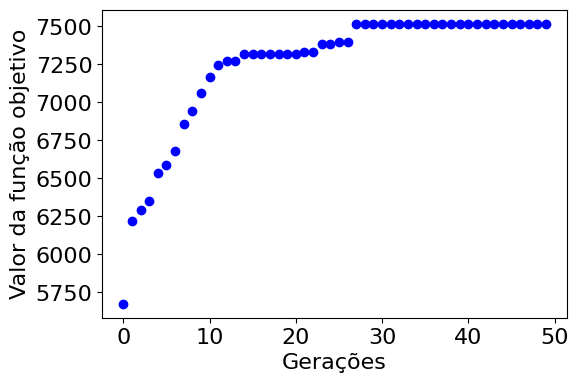

total_weight: 845 total_value: 7517
Unpacked Item value: 59 weight: 30
Unpacked Item value: 67 weight: 94
Unpacked Item value: 52 weight: 81
Unpacked Item value: 93 weight: 70
Unpacked Item value: 125 weight: 64
Unpacked Item value: 38 weight: 36
Unpacked Item value: 35 weight: 32
Unpacked Item value: 110 weight: 48
Unpacked Item value: 22 weight: 55
Unpacked Item value: 50 weight: 29
Unpacked Item value: 87 weight: 18
Unpacked Item value: 73 weight: 56
Unpacked Item value: 15 weight: 29
Unpacked Item value: 26 weight: 93
Unpacked Item value: 78 weight: 44
Unpacked Item value: 85 weight: 86
Unpacked Item value: 43 weight: 65
Unpacked Item value: 10 weight: 79
Unpacked Item value: 19 weight: 20


<Figure size 640x480 with 0 Axes>

In [22]:

from algorithms.ga_elites import GAElite
from common.individual import Individual

# Binary Representation

ga = GAElite(problem=problem,
             elite_size=20)

best_solution: Individual = ga.run()

knap.print_genes(best_solution.decision_vector)